In [1]:
%matplotlib inline
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt', names=['name','sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [2]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [3]:
years = range(1880, 2015)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [4]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


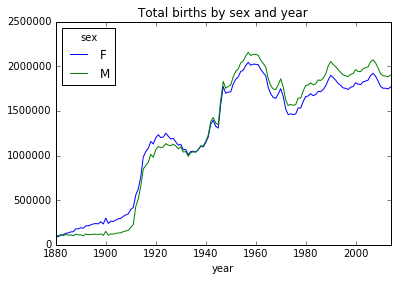

In [5]:
total_births.plot(title='Total births by sex and year')

In [6]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [7]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [8]:
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True

In [9]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2014 M   1812426      Dario   M     214  2014  0.000113
         1812427       Kale   M     214  2014  0.000113
         1812428  Broderick   M     213  2014  0.000112
         1812429    Jayvion   M     213  2014  0.000112
         1812430     Kaison   M     213  2014  0.000112
         1812431       Koen   M     213  2014  0.000112
         1812432     Magnus   M     213  2014  0.000112
         1812435   Valentin   M     212  2014  0.000111
         1812434     Teagan   M     212  2014  0.000111
         1812433     Darien   M     212  2014  0.000111
         1812436      Bodie   M     211  2014  0.000111
         1812437    Brayson   M     211  2014  0.000111
         1812438      Chace   M     211  2014  0.000111
         1812439      Kylen   M     209  2014  0.000110
         1812440     Yehuda   M     209  2014  0.000110
         1812441    Bridger   M     208  2014  0.000109
         1812442     Howard   M     208  2014  0.000109
         1812443     Maddux   M     208  2014  0.000109
         1812444    Osvaldo   M     208  2014  0.000109
         1812445      Rocky   M     208  2014  0.000109
         1812449       Jair   M     207  2014  0.000109
         1812451      Tyree   M     207  2014  0.000109
         1812450    Reyansh   M     207  2014  0.000109
         1812448     Foster   M     207  2014  0.000109
         1812447      Boden   M     207  2014  0.000109
         1812446       Ayan   M     207  2014  0.000109
         1812452        Ean   M     206  2014  0.000108
         1812453       Leif   M     205  2014  0.000108
         1812454     Reagan   M     205  2014  0.000108
         1812455      Rylen   M     205  2014  0.000108

[269877 rows x 5 columns]

In [10]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023263E42278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023264118EB8>], dtype=object)

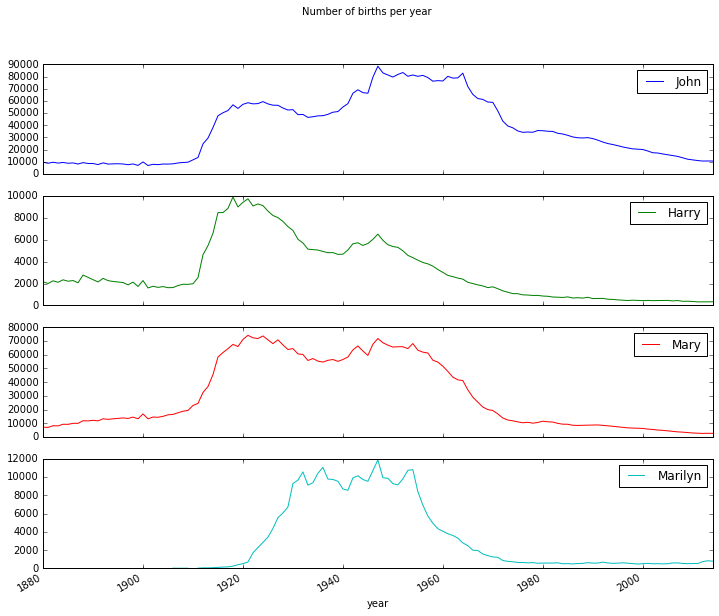

In [11]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10),grid=False,title='Number of births per year')

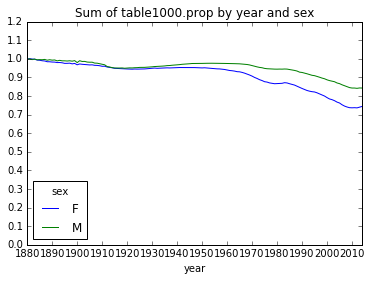

In [12]:
table = top1000.pivot_table('prop', index='year', columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020,10))

In [13]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1677392        Jacob   M   22082  2010  0.011538
         1677393        Ethan   M   17985  2010  0.009397
         1677394      Michael   M   17308  2010  0.009044
         1677395       Jayden   M   17152  2010  0.008962
         1677396      William   M   17030  2010  0.008898
         1677397    Alexander   M   16742  2010  0.008748
         1677398         Noah   M   16428  2010  0.008584
         1677399       Daniel   M   15815  2010  0.008263
         1677400        Aiden   M   15516  2010  0.008107
         1677401      Anthony   M   15470  2010  0.008083
         1677402       Joshua   M   15410  2010  0.008052
         1677403        Mason   M   14831  2010  0.007749
         1677404  Christopher   M   14243  2010  0.007442
         1677405       Andrew   M   14221  2010  0.007431
         1677406        David   M   14171  2010  0.007404
         1677407      Matthew   M   14099  2010  0.007367
         1677408        Logan   M   14012  2010  0.007321
         1677409       Elijah   M   13867  2010  0.007246
         1677410        James   M   13852  2010  0.007238
         1677411       Joseph   M   13798  2010  0.007210
         1677412      Gabriel   M   12854  2010  0.006716
         1677413     Benjamin   M   12417  2010  0.006488
         1677414         Ryan   M   11963  2010  0.006251
         1677415       Samuel   M   11939  2010  0.006238
         1677416      Jackson   M   11804  2010  0.006168
         1677417         John   M   11539  2010  0.006029
         1677418       Nathan   M   11365  2010  0.005938
         1677419     Jonathan   M   11103  2010  0.005801
         1677420    Christian   M   11080  2010  0.005789
         1677421         Liam   M   10921  2010  0.005706
...                       ...  ..     ...   ...       ...
         1678362       Lathan   M     203  2010  0.000106
         1678361         Kael   M     203  2010  0.000106
         1678360     Demarion   M     203  2010  0.000106
         1678365       Gibson   M     202  2010  0.000106
         1678367       Reagan   M     202  2010  0.000106
         1678366        Keyon   M     202  2010  0.000106
         1678368     Kingsley   M     201  2010  0.000105
         1678369        Talan   M     201  2010  0.000105
         1678370       Yehuda   M     201  2010  0.000105
         1678371    Cristofer   M     200  2010  0.000105
         1678372      Dashawn   M     200  2010  0.000105
         1678373       Daylen   M     200  2010  0.000105
         1678374       Jordon   M     200  2010  0.000105
         1678375      Sheldon   M     200  2010  0.000105
         1678379        Rowen   M     199  2010  0.000104
         1678380        Slade   M     199  2010  0.000104
         1678377        Kadin   M     199  2010  0.000104
         1678378        Masen   M     199  2010  0.000104
         1678376     Clarence   M     199  2010  0.000104
         1678381       Dillan   M     198  2010  0.000103
         1678382     Thaddeus   M     198  2010  0.000103
         1678383       Yousef   M     198  2010  0.000103
         1678384      Clinton   M     197  2010  0.000103
         1678385       Truman   M     197  2010  0.000103
         1678390      Keshawn   M     196  2010  0.000102
         1678392       Simeon   M     196  2010  0.000102
         1678391       Reuben   M     196  2010  0.000102
         1678388        Enoch   M     196  2010  0.000102
         1678389       Joziah   M     196  2010  0.000102
         1678387      Eliezer   M     196  2010  0.000102

[1000 rows x 5 columns]

In [14]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1677392    0.011538
           1677393    0.020935
           1677394    0.029979
           1677395    0.038941
           1677396    0.047839
           1677397    0.056587
           1677398    0.065171
           1677399    0.073434
           1677400    0.081541
           1677401    0.089625
Name: prop, dtype: float64

In [15]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [16]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [21]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [18]:
diversity=diversity.astype(float)

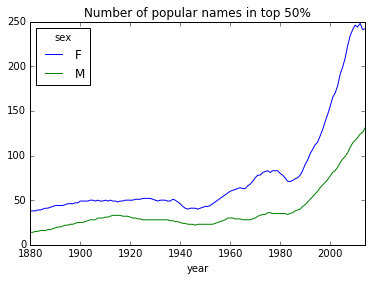

In [19]:
diversity.plot(title='Number of popular names in top 50%')

In [23]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex','year'],aggfunc=sum)

In [24]:
subtable = table.reindex(columns=[1910,1960,2010], level='year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108397  691245  675901    977    5214   28814
b               NaN     694     454    411    3912   39208
c                 5      49     953    482   15466   23307
d              6751    3728    2635  22113  262143   44758
e            133601  435048  316288  28665  178810  130073

In [25]:
subtable.sum()

sex  year
F    1910     396501
     1960    2022093
     2010    1772738
M    1910     194218
     1960    2132717
     2010    1913851
dtype: float64

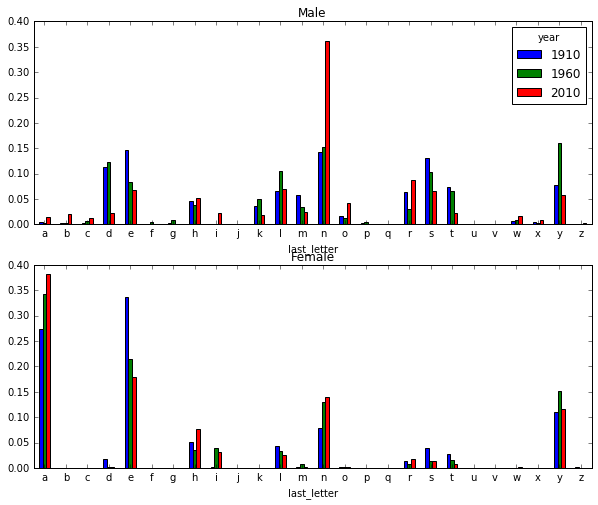

In [27]:
letter_prop = subtable / subtable.sum().astype(float)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [28]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405


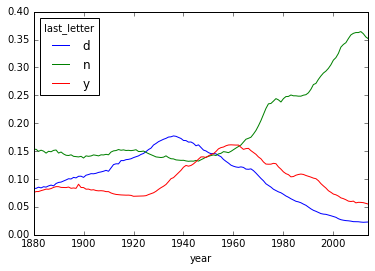

In [29]:
dny_ts.plot()

In [32]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [33]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    375129
Lesly      11429
Name: births, dtype: int64

In [35]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2010,1,NaN
2011,1,NaN
2012,1,NaN
2013,1,NaN
2014,1,NaN


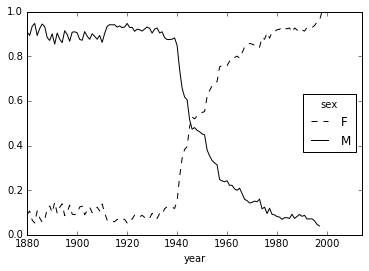

In [36]:
table.plot(style={'M':'k-','F':'k--'})